In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Домашнее_задание_1.xlsx')
df.head()

,year,company,"revenue, $K",rate
0,2008,Shmuber,5,1
1,2008,Kett,1000,1
2,2008,Tindex Taxi,890,1
3,2008,Krap,899,1
4,2008,Loft,760,1


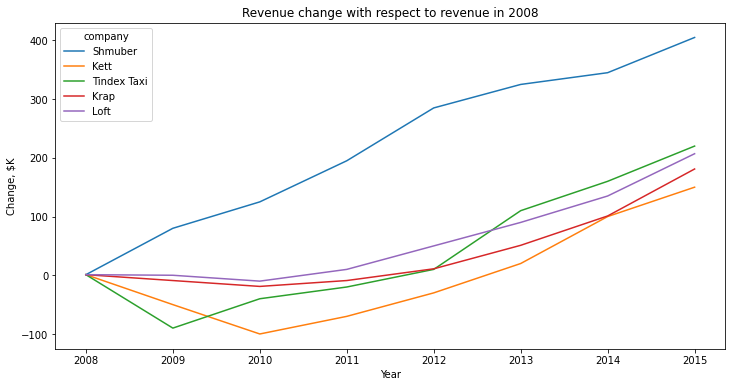

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='rate', hue='company', ax=ax)
ax.set_title('Revenue change with respect to revenue in 2008')
ax.set_xlabel('Year')
ax.set_ylabel('Change, $K')
plt.show()

### Первоначальный график показывает на сколько изменилась выручка компаний по сравнению с 2008 годом и у компании Shmuber действительно был значительный положительный рост, но тут не учитывется реальная сумма выручки.

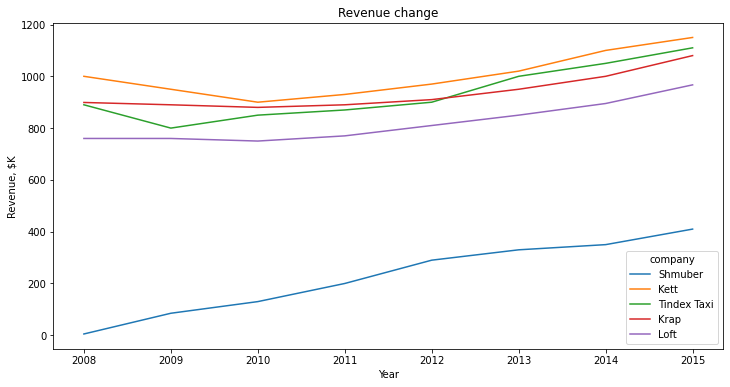

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='revenue, $K', hue='company', ax=ax)
ax.set_title('Revenue change')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue, $K')
plt.show()

### На втором графике я показал фактическое изменение выручки компаний и уже видно, что все компании имеют намного большую выручку чем Shmuber. Но рост выручки у компании действительно кажется более выраженым.

In [49]:
data = None

for company_name in df['company'].unique():
    data_ = df[df['company'] == company_name]
    data_['pct_change'] = data_['revenue, $K'].pct_change()

    if data is not None:
        data = pd.concat([data, data_], axis=0).reset_index(drop=True)
    else:
        data = data_

data

/var/folders/cj/7pbw4t016v72qg78txbzq1b40000gn/T/ipykernel_84937/3340290566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['pct_change'] = data_['revenue, $K'].pct_change()
/var/folders/cj/7pbw4t016v72qg78txbzq1b40000gn/T/ipykernel_84937/3340290566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['pct_change'] = data_['revenue, $K'].pct_change()
/var/folders/cj/7pbw4t016v72qg78txbzq1b40000gn/T/ipykernel_84937/3340290566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

,year,company,"revenue, $K",rate,pct_change
0,2008,Shmuber,5,1,NaN
1,2009,Shmuber,85,80,16.000000
2,2010,Shmuber,130,125,0.529412
3,2011,Shmuber,200,195,0.538462
4,2012,Shmuber,290,285,0.450000
5,2013,Shmuber,330,325,0.137931
6,2014,Shmuber,350,345,0.060606
7,2015,Shmuber,410,405,0.171429
8,2008,Kett,1000,1,NaN
9,2009,Kett,950,-50,-0.050000


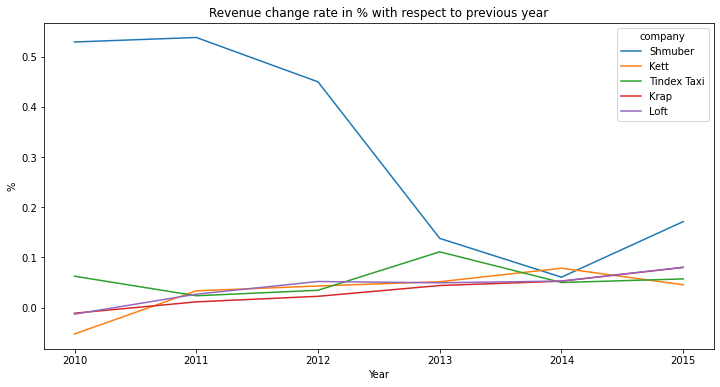

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=data[data['year'] > 2009], x='year', y='pct_change', hue='company', ax=ax)
ax.set_title('Revenue change rate in % with respect to previous year')
ax.set_xlabel('Year')
ax.set_ylabel('%')
plt.show()

### На третем графике я показываю изменение выручки компаний по сравнению к предыдущему году в процентах. На нем видно, что у Shmuber график очень не стабильный, и хоть рост выручки в процнтах намного выше чем у конкурентов, он сильно падает к 2014 году. В то время как  остальных компаний рост выручки меньше, но он стабильно поднимается

### Как дополнительные данные можно было бы запросить данные о поездках (кол-ва, цены, время и т.д.), о пассажирах, водителях